# Full Pipeline of Clustering in Antarctica

### Introduction

<img src="images/intro_figure_2.png"  width=500 height=450>
<img src="images/intro_figure.png"  width=500 height=450>

In [1]:
!pip install proplot 

In [2]:
from icepyx import icesat2data as ipd
import numpy as np
import os
import shutil
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sys
import pyproj
import proplot as plot

#%matplotlib widget
%matplotlib inline

## Download and extract histograms and other relevant parameters as npy arrays
**Skip to the next step if you have already saved the arrays previously.**

Extract histograms using the `get_hists.py` module. Using this script, we extract and save the relevant variables once and load them quickly instead of downloading and reading the HDF5 every time.

In [3]:
!python /home/jovyan/surface_classification/scripts/get_hists.py --HELP

Commandline options:
Type '--HELP' or '-H' flag for help.
Type '--DIR=' or '-D:' flag to specify data directory.
Type '--EXTENT=' or '-E:' flag to specify data spatial extent.
Type '--DATE=' or '-T:' to specify data date range.
Type '--USER=' or '-U:' flag to specify EarthData username.
Type '--EMAIL=' or '-E:' flag to specify EarthData email.
Type '--noDownload' or '-N' flag to skip downloading data if it's already there.
Done.


In [4]:
#spatial_extent = [31.5, -70.56, 33.73, -69.29]
spatial_extent = [0.0, -72.0, 50.00, -68.5]
date_range = ['2020-03-30','2020-04-1']

In [5]:
#-- directory setup
data_dir = '/home/jovyan/data'

In [6]:
# We iterate the regions eastwards
#for area in range(1, 20):
#    spatial_extent[0] = spatial_extent[0]+2
#    spatial_extent[2] = spatial_extent[2]+2
#    current_extent = str(spatial_extent)[1:-1]
#    print("\nCurrent extent: " + current_extent)

user = "ymohajer"
email = "ymohajer@uci.edu"
download = False

# I have to execute this code outside get_hists.py, otherwise I cannot insert the EarthData password from the notebook
#-- login to earth data and get data
if(download):
    region_a = ipd.Icesat2Data('ATL06', spatial_extent, date_range)
    region_a.earthdata_login(user,email)

    #-- put data order
    region_a.order_vars.append(var_list=['count'])
    #-- download data
    region_a.download_granules(data_dir)

In [7]:
process = False
if(process):
    !python /home/jovyan/surface_classification/scripts/get_hists.py --noDownload --EXTENT='[0.0, -72.0, 50.00, -68.5]' --DATE="'2020-03-30','2020-04-1'" --USER="$user" --EMAIL="$email"

## Load histograms and plot

In [8]:
import copy

path_hists = os.path.join(data_dir, 'hist')
path_lon = os.path.join(data_dir, 'lon')
path_lat = os.path.join(data_dir, 'lat')

hists = np.asarray(os.listdir(path_hists))
lons = np.asarray(os.listdir(path_lon))
lats = np.asarray(os.listdir(path_lat))

count_files, lon_files, lat_files = [],[],[]
for hist, lon, lat in zip(hists, lons, lats):
    
    # We fetch the file name from lon in order to make sure we process the same lat
    lat = lon[:-17] + "lat" + lon[-14:]

    print("\nlon path: " + str(lon))
    print("lat path: " + str(lat))
    count_files.append(np.load(os.path.join(path_hists,hist)))
    lon_files.append(round(np.load(os.path.join(path_lon,lon)).mean(), 2))
    lat_files.append(round(np.load(os.path.join(path_lat,lat)).mean(), 2))
count_files = np.asarray(count_files)
lon_files = np.asarray(lon_files)
lat_files = np.asarray(lat_files)

print(count_files.shape)
print("Mean longitudes per transect: " + str(lon_files))
print("Mean latitudes per transect: " + str(lat_files))


lon path: processed_ATL06_20200330134938_00610712_003_01_lon_mean_gt2r.npy
lat path: processed_ATL06_20200330134938_00610712_003_01_lat_mean_gt2r.npy

lon path: processed_ATL06_20200401001037_00830710_003_01_lon_mean_gt2r.npy
lat path: processed_ATL06_20200401001037_00830710_003_01_lat_mean_gt2r.npy

lon path: processed_ATL06_20200331114942_00750712_003_01_lon_mean_gt3r.npy
lat path: processed_ATL06_20200331114942_00750712_003_01_lat_mean_gt3r.npy

lon path: processed_ATL06_20200401112403_00900712_003_01_lon_mean_gt2r.npy
lat path: processed_ATL06_20200401112403_00900712_003_01_lat_mean_gt2r.npy

lon path: processed_ATL06_20200330010155_00530710_003_01_lon_mean_gt3r.npy
lat path: processed_ATL06_20200330010155_00530710_003_01_lat_mean_gt3r.npy

lon path: processed_ATL06_20200331003615_00680710_003_01_lon_mean_gt1r.npy
lat path: processed_ATL06_20200331003615_00680710_003_01_lat_mean_gt1r.npy

lon path: processed_ATL06_20200401125821_00910712_003_01_lon_mean_gt1r.npy
lat path: processe


Cropping the data far from surface in each histogram.

In [9]:
data_array = []
for count in count_files:
    data_array.append(count[:, 200:550])
data_array = np.asarray(data_array)
print(data_array.shape)

(39,)


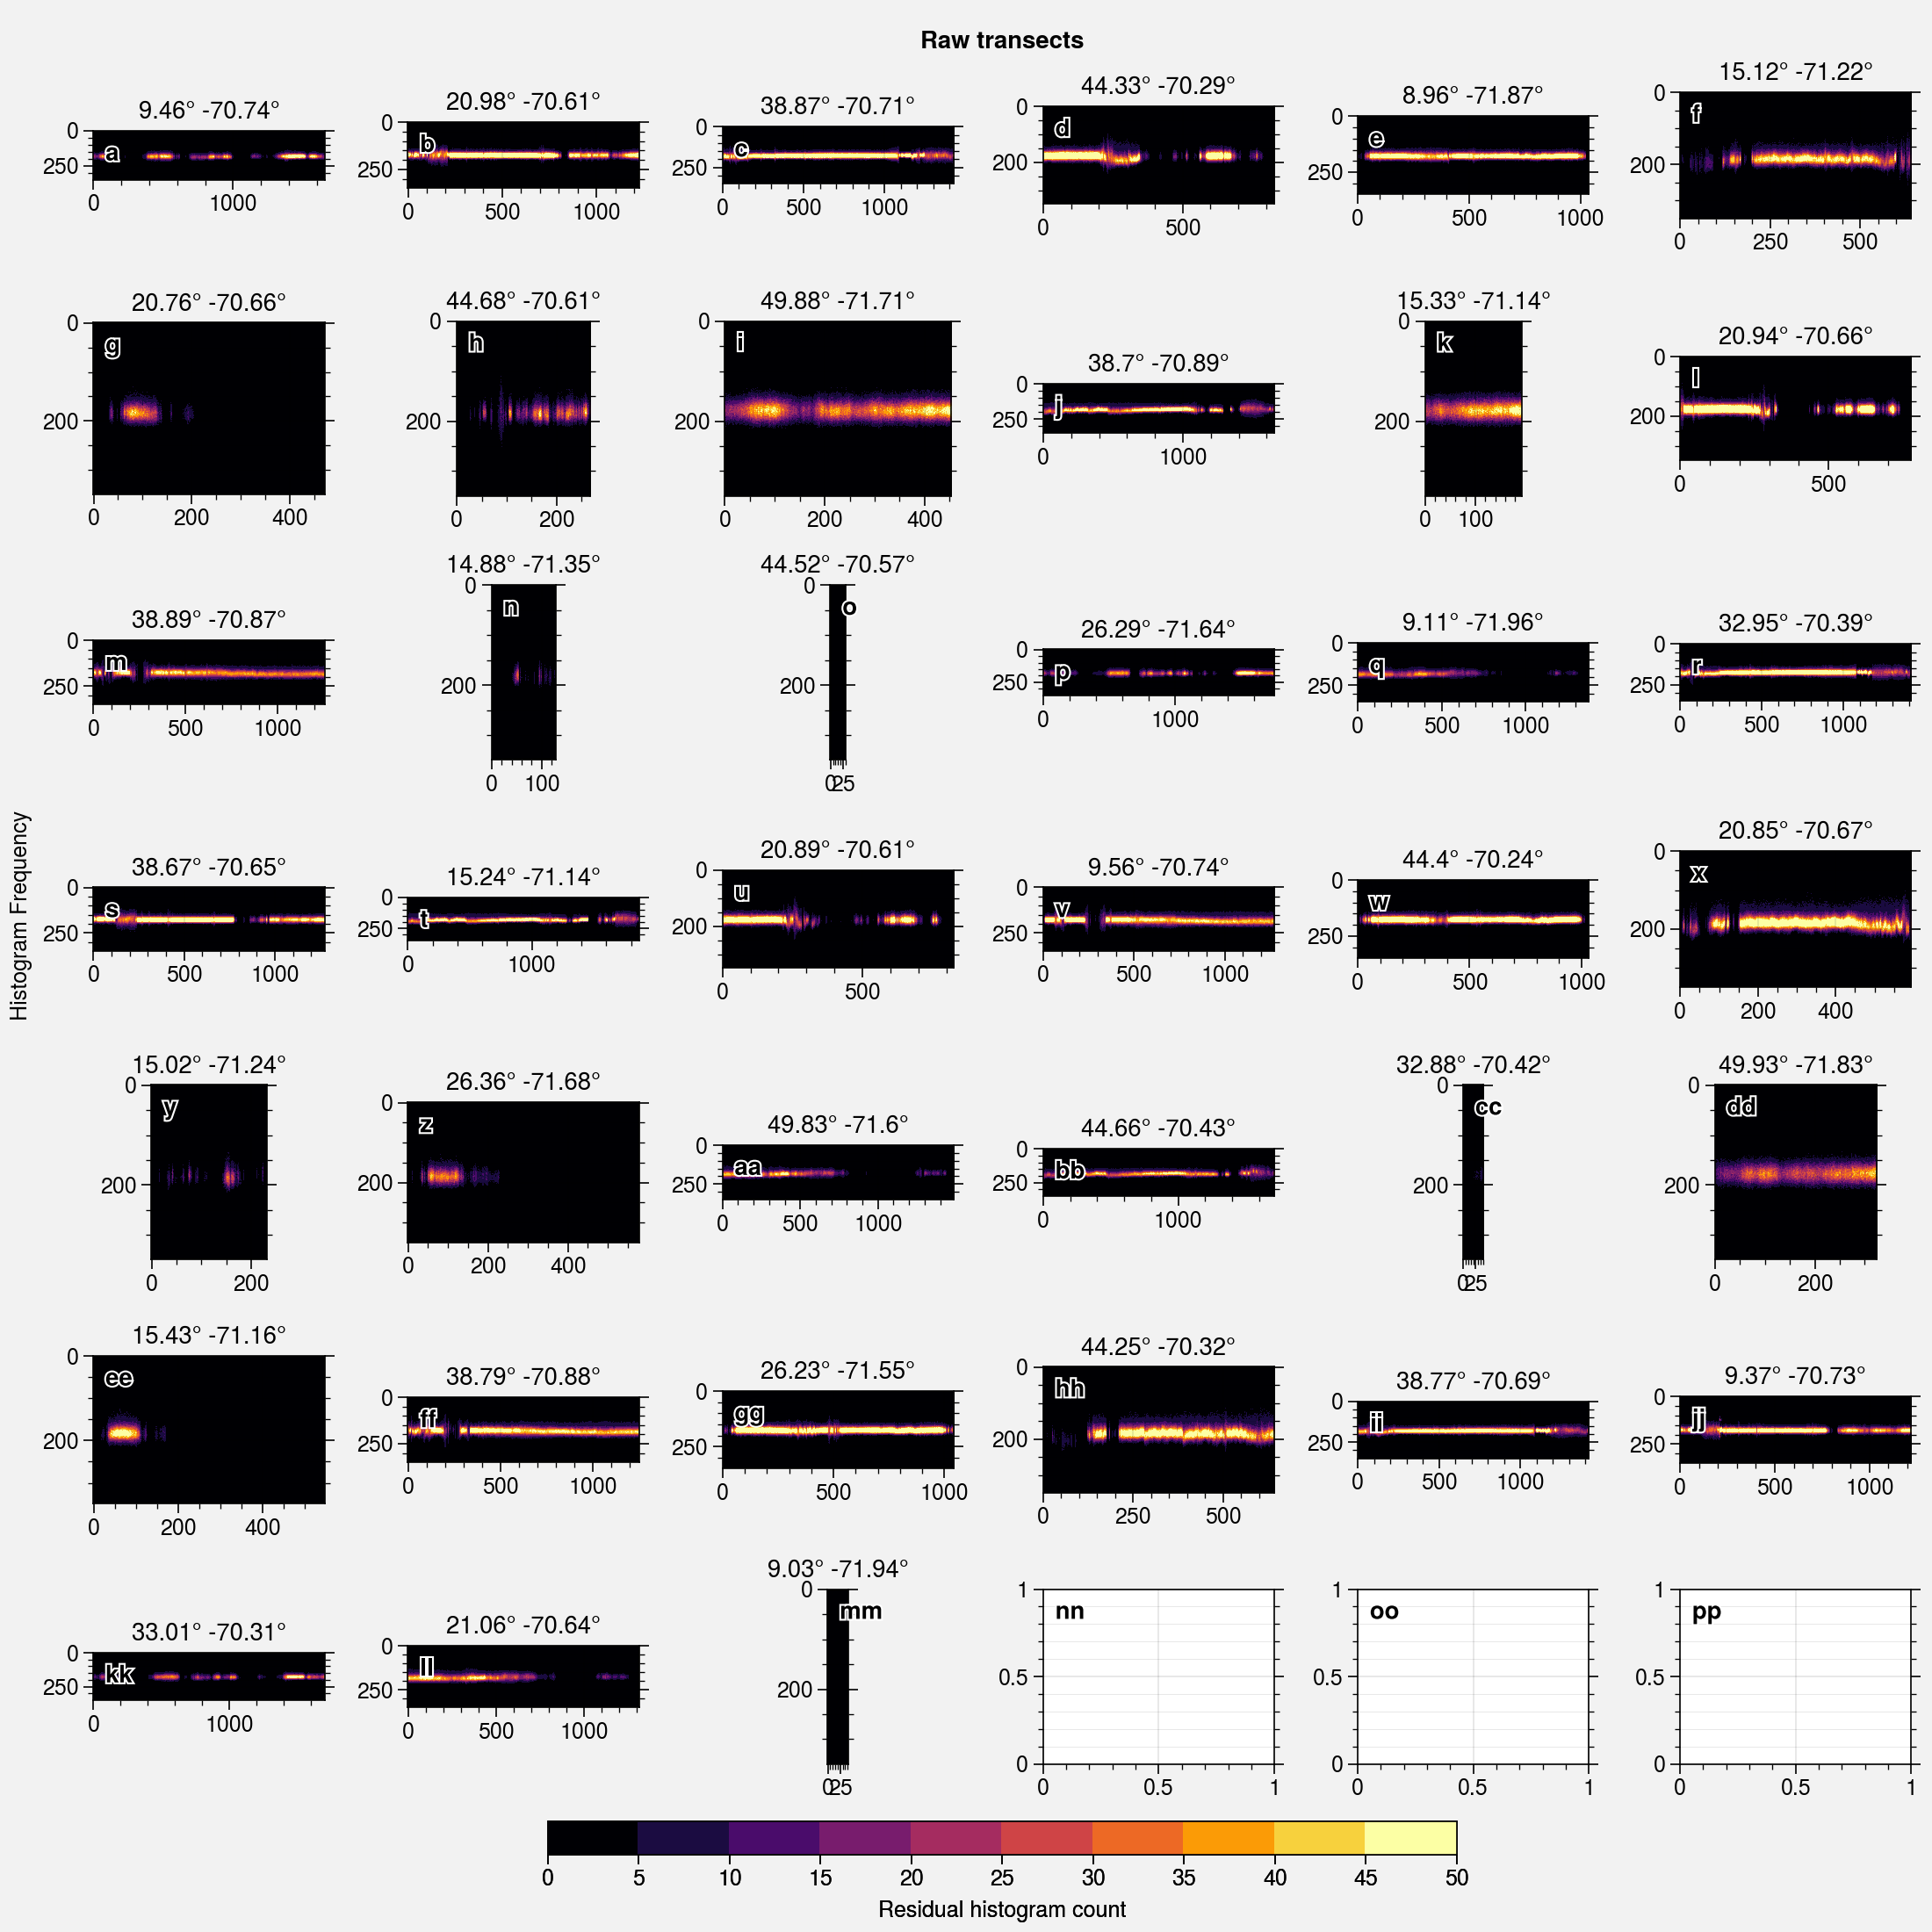

In [10]:
fig_raw, axraw = plot.subplots(ncols=6, nrows=7, share=1, width=11, height=11)
fig_raw.suptitle("Raw transects")
axraw.format(
        abc=True, abcloc='ul',
        ygridminor=True,
        ytickloc='both', yticklabelloc='left'
)

h = axraw[0].imshow(np.transpose(data_array[0]),vmin=0,vmax=50,cmap='inferno')

# Residual histograms
for ax, data, lon, lat in zip(axraw,data_array, lon_files, lat_files):
    ax.imshow(np.transpose(data),vmin=0,vmax=50,cmap='inferno')
    ax.set_ylabel('Histogram Frequency')
    ax.format(title=str(lon) + "° " + str(lat) + "°")
    
fig_raw.colorbar(h, length=0.5, label='Residual histogram count', loc='b', locator=5)

plt.show()

<h2> Plotting track on map</a>

First load the `lon_mean` and `lat_mean` variables.

In [11]:
lon_means, lat_means = [],[]
for lon in lons:
    # We fetch the file name from lon in order to make sure we process the same lat
    lat = lon[:-17] + "lat" + lon[-14:]
    lon_means.append(np.load(os.path.join(path_lon,lon)))
    lat_means.append(np.load(os.path.join(path_lat,lat)))
lon_means = np.asarray(lon_means)
lat_means = np.asarray(lat_means)

Plot comparing mean_lon and mean_lon from histrograms with beam lat and lon.
Firt we load the parameters:

In [12]:
h_lon = np.load(os.path.join(data_dir,'processed_ATL06_20200330121520_00600712_003_01_h_lon_gt1r.npy'))
h_lat = np.load(os.path.join(data_dir,'processed_ATL06_20200330121520_00600712_003_01_h_lat_gt1r.npy'))

<h2>Unsupervised learning of ATL06 residual histograms</h2>

In [13]:
from sklearn.cluster import KMeans,AffinityPropagation,DBSCAN,OPTICS,MeanShift,AgglomerativeClustering,Birch
from sklearn.preprocessing import StandardScaler

path_clustering = "/home/jovyan/surface_classification/data/Antarctica_clustering"

In [14]:
# Concatenate all subregions together
data = np.concatenate((data_array), axis=0)

print(data.shape)

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(data)

(37036, 350)


In [15]:
#-- K MEANS CLUSTERING

print("Training data shape: " + str(X.shape))

# Use int random_state in order to make centroid initialization deterministic
#kmeans4 = KMeans(n_clusters=4, random_state=1).fit(X)
kmeans4 = KMeans(n_clusters=4, random_state=1).fit(data)

inertias = []
for n in range(2, 10):
    inertias.append(KMeans(n_clusters=n, random_state=1).fit(data).inertia_)

inertias = np.asarray(inertias)

Training data shape: (37036, 350)


[2 2 2 ... 0 0 0]
147917033.43283567


Text(0, 0.5, 'Inertia')

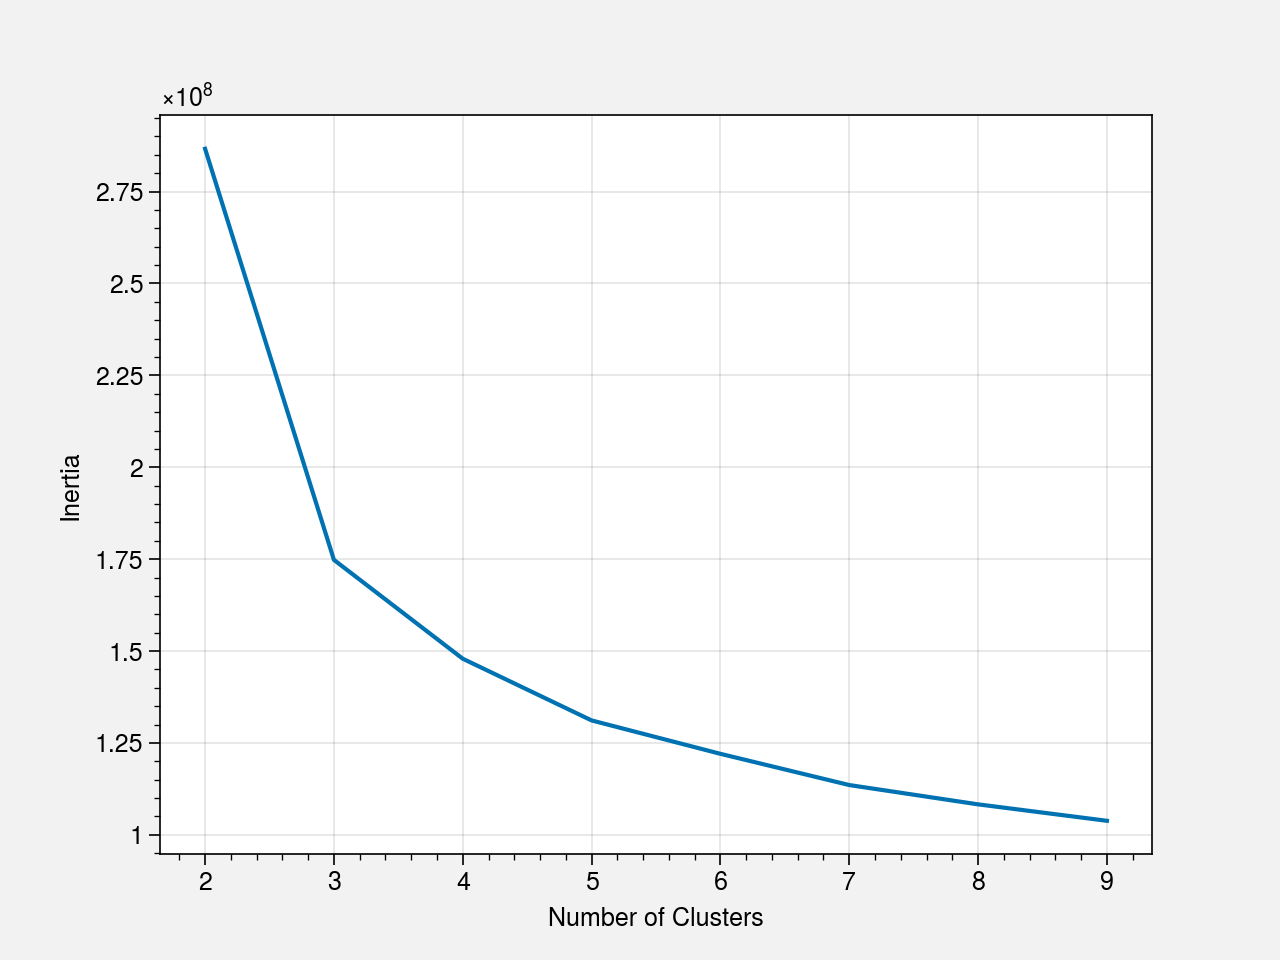

In [16]:
print(kmeans4.labels_)
print(kmeans4.inertia_)

plt.plot(range(2,10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

(4, 350)


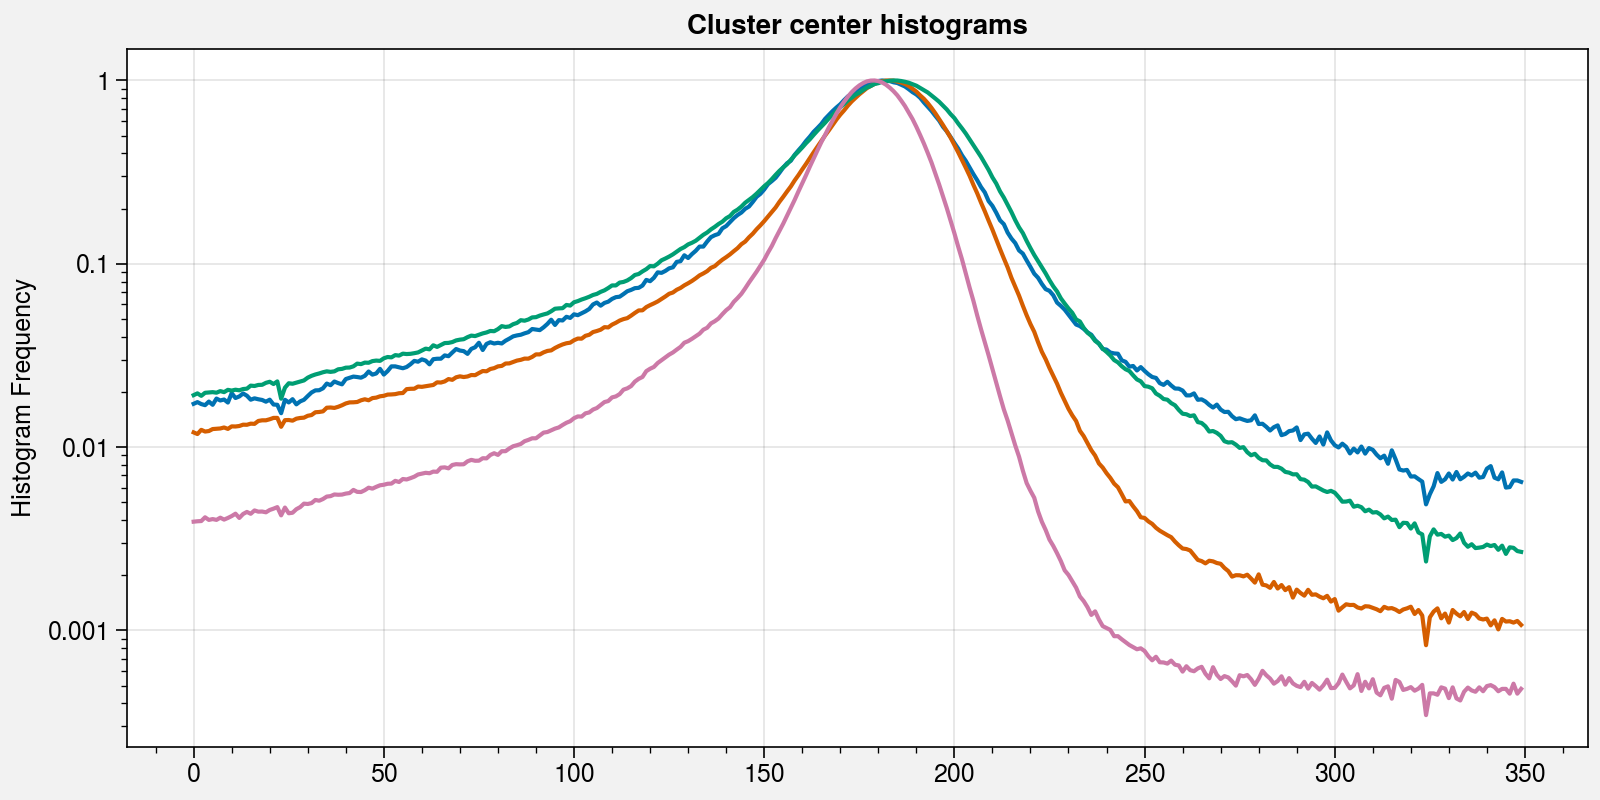

In [17]:
print(kmeans4.cluster_centers_.shape)

fig_clusters, ax_clusters = plot.subplots(ncols=1, nrows=1, share=1, width=8, height=4)
fig_clusters.suptitle("Cluster center histograms")
axraw.format(
        abc=True, abcloc='ul',
        ygridminor=True,
        ytickloc='both', yticklabelloc='left'
)

for cluster, label in zip(kmeans4.cluster_centers_, kmeans4.labels_):
    ax_clusters.semilogy(range(cluster.size), cluster/np.max(cluster))
    ax_clusters.set_ylabel('Histogram Frequency')
    #ax.set_title(label)

plt.show()

## Exploring clustering algorithms:

We use a few algorithms on a *subset* of the data to compare the results. You can read more about the approaches [here](https://scikit-learn.org/stable/modules/clustering.html)

In [18]:
#-- number of points to slice for comparison
num_sample = 1000

In [19]:
#-- AFFINITY PROPAGATION CLUSTERING
# This one needs a lot of damping in order to minimize the division into small clusters
# Despite a super high damping, it finds many small cluster at the transitions between areas
affinity = AffinityPropagation(random_state=1, damping=0.95, max_iter=500).fit(data[:num_sample,:])

In [20]:
#-- DBSCAN
dbscan = DBSCAN(eps=20, min_samples=2).fit(data[:num_sample,:])

In [21]:
#-- OPTICS
# I haven't found a way to tune this one. All parameters seem to be insensitive to our data
optics = OPTICS(min_samples=2).fit(data[:num_sample,:])

In [22]:
#-- MEAN SHIFT
meanshift = MeanShift().fit(data[:num_sample,:])

In [23]:
#-- AgglomerativeClustering
agg4 = AgglomerativeClustering(n_clusters=4).fit(data[:num_sample,:])
#agg16 = AgglomerativeClustering(n_clusters=16).fit(X)

In [24]:
#-- Birch
birch4 = Birch(n_clusters=4).fit(data[:num_sample,:])
#birch16 = Birch(n_clusters=16).fit(X)

In [25]:
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(data[:num_sample,:])
kmeans4_sub = KMeans(n_clusters=4, random_state=1).fit(data[:num_sample,:])

We plot the classified labels

Text(0, 0.5, 'Classification label')

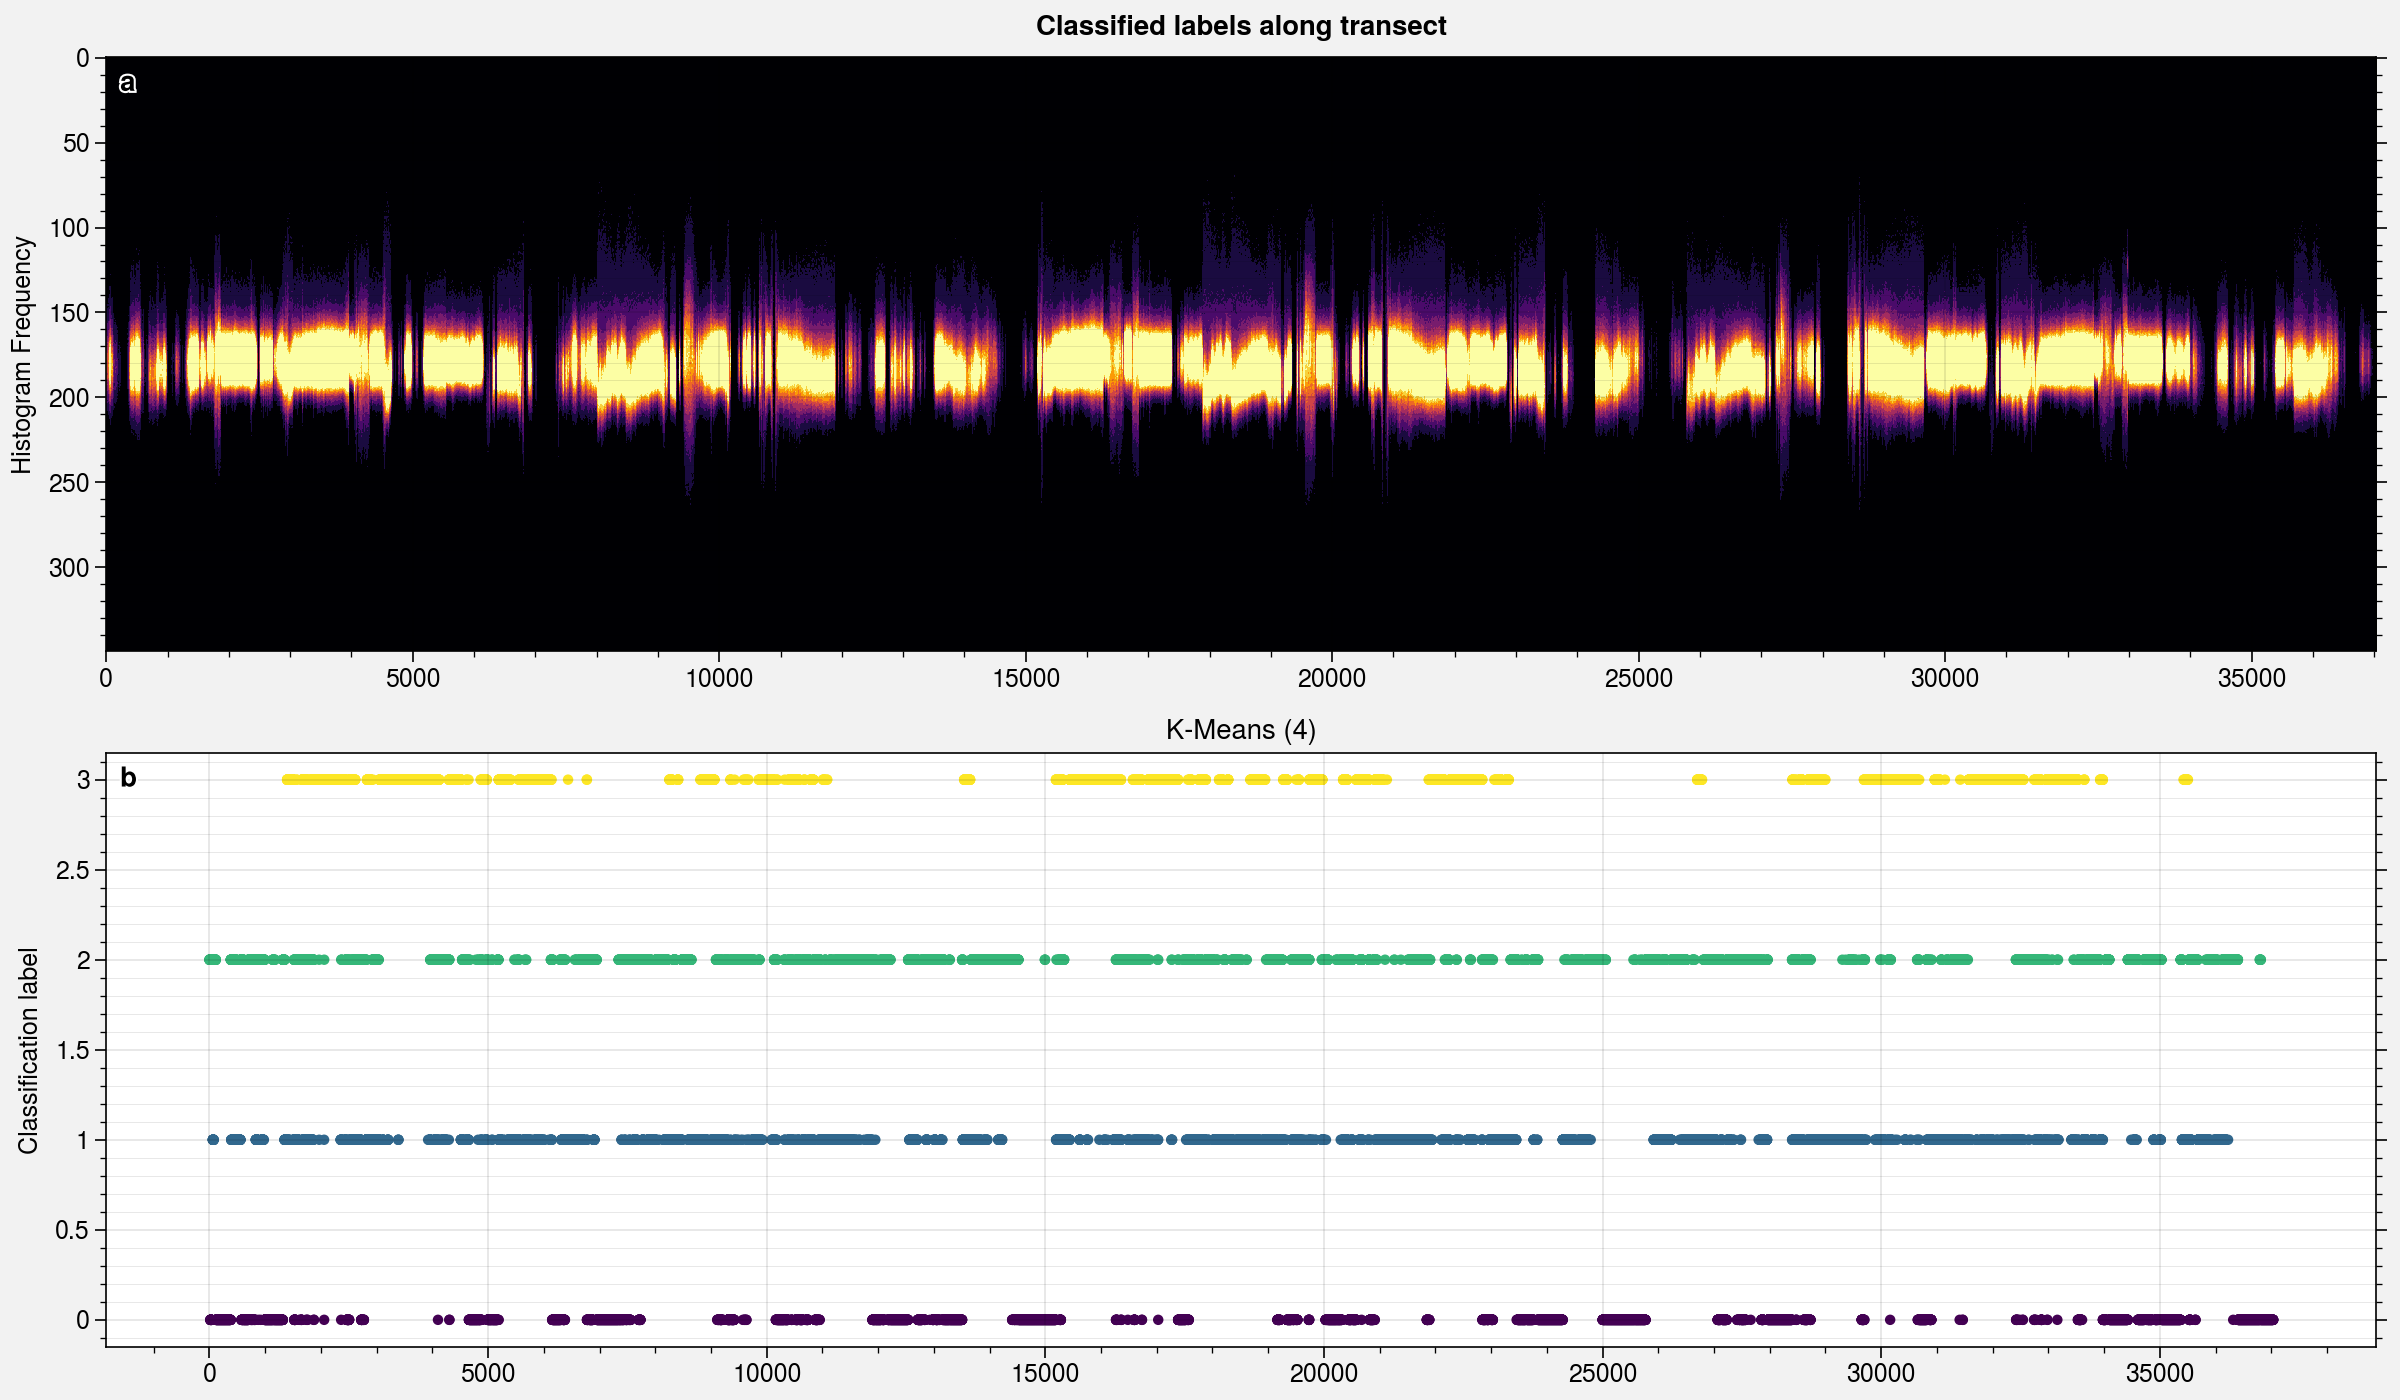

In [26]:
figk, axk = plot.subplots(ncols=1, nrows=2, share=0, width=12, height=7)

figk.suptitle("Classified labels along transect")

axk.format(
        abc=True, abcloc='ul',
        ygridminor=True,
        ytickloc='both', yticklabelloc='left'
)

# Residual histograms
axk[0].imshow(np.transpose(data),vmin=0,vmax=30,cmap='inferno')
axk[0].set_ylabel('Histogram Frequency')
axk[0].set_aspect('auto')

#-- MEAN SHIFT
axk[1].scatter(range(0,data.shape[0]), kmeans4.labels_, c=kmeans4.labels_, s=10, cmap='viridis')
axk[1].set_title('K-Means (4)')
axk[1].set_ylabel('Classification label')


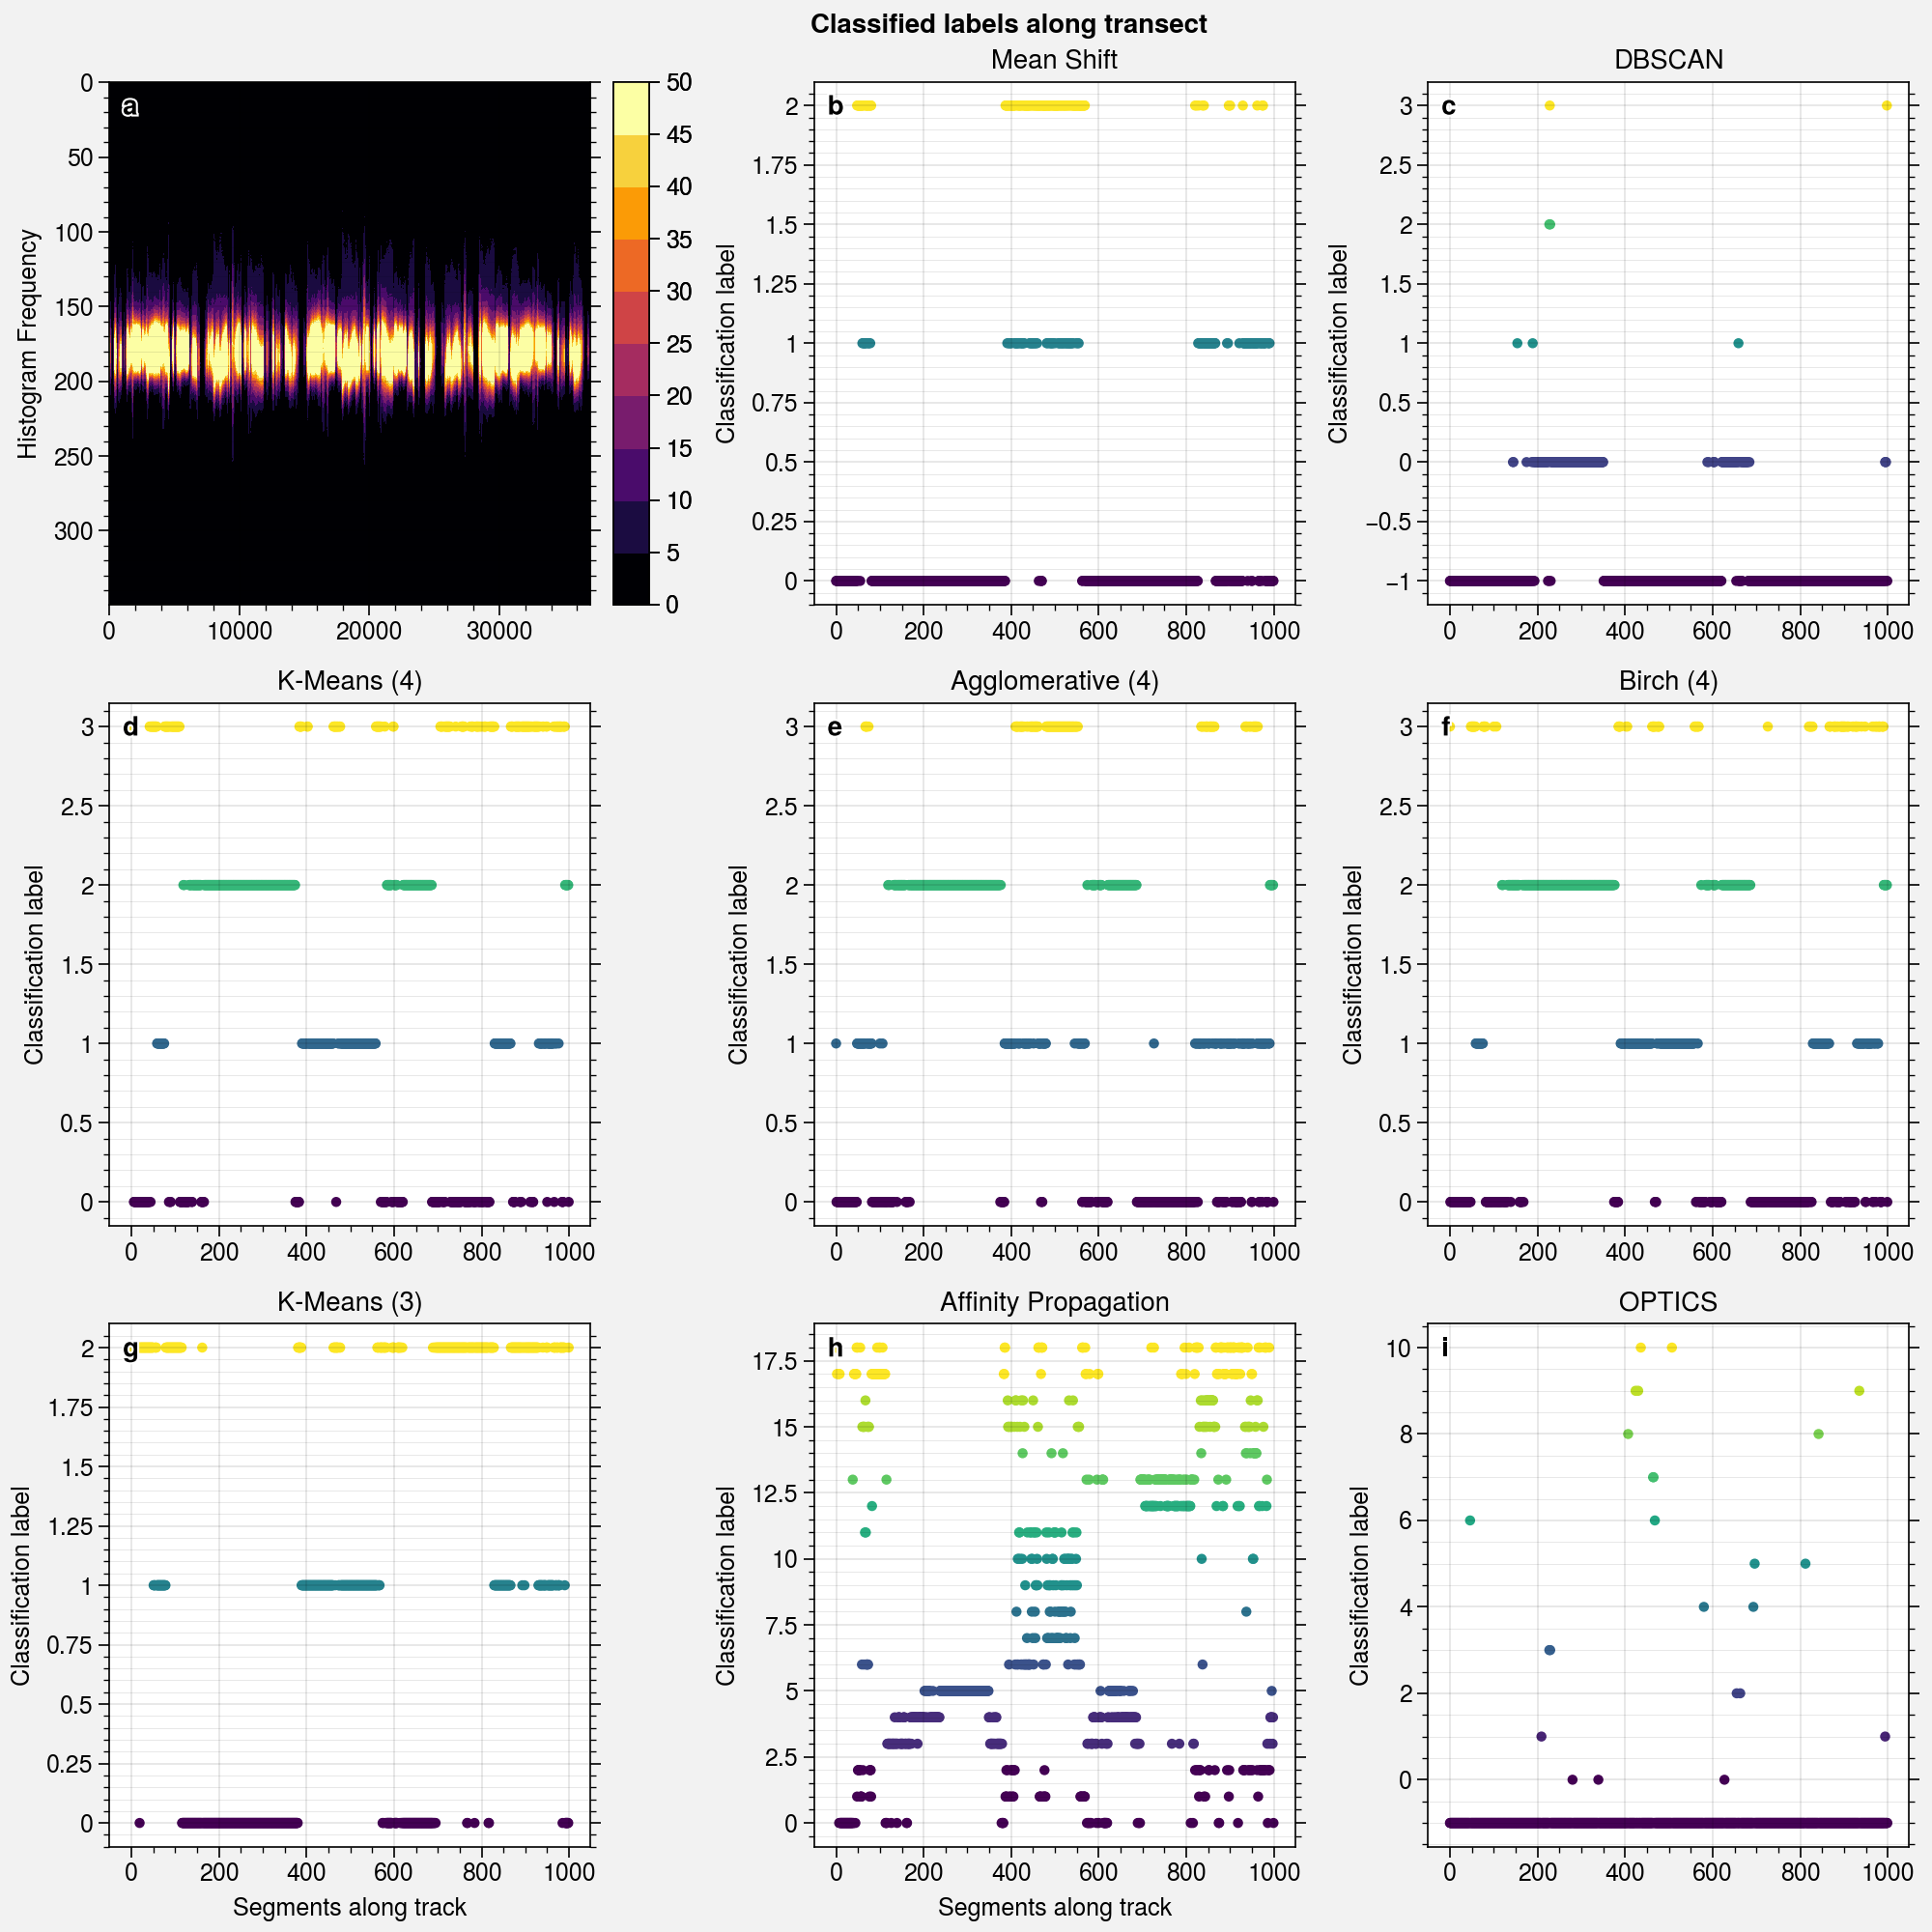

In [27]:
fig1, ax1 = plot.subplots(ncols=3, nrows=3, share=0, width=10, height=10)

fig1.suptitle("Classified labels along transect")

ax1.format(
        abc=True, abcloc='ul',
        ygridminor=True,
        ytickloc='both', yticklabelloc='left'
)

# Residual histograms
ax1[0,0].imshow(np.transpose(data),vmin=0,vmax=30,cmap='inferno')
ax1[0,0].colorbar(h)
ax1[0,0].set_ylabel('Histogram Frequency')
ax1[0,0].set_aspect('auto')

#-- MEAN SHIFT
ax1[0,1].scatter(range(0,num_sample), meanshift.labels_, c=meanshift.labels_, s=10, cmap='viridis')
ax1[0,1].set_title('Mean Shift')
ax1[0,1].set_ylabel('Classification label')


#-- PLOT DBCAN and OPTICS
ax1[0,2].scatter(range(0,num_sample), dbscan.labels_, c=dbscan.labels_, s=10, cmap='viridis')
ax1[0,2].set_title('DBSCAN')
ax1[0,2].set_ylabel('Classification label')


#----------------------
#-- row with 4 CLUSTERS
#----------------------
#-- k means
ax1[1,0].scatter(range(0,num_sample), kmeans4_sub.labels_, c=kmeans4_sub.labels_, s=10,  cmap='viridis')
ax1[1,0].set_title('K-Means (4)')
ax1[1,0].set_ylabel('Classification label')

#-- AGG
ax1[1,1].scatter(range(0,num_sample), agg4.labels_, c=agg4.labels_, s=10, cmap='viridis')
ax1[1,1].set_title('Agglomerative (4)')
ax1[1,1].set_ylabel('Classification label')

#-- BIRCH
ax1[1,2].scatter(range(0,num_sample), birch4.labels_, c=birch4.labels_, s=10, cmap='viridis')
ax1[1,2].set_title('Birch (4)')
ax1[1,2].set_ylabel('Classification label')


#----------------------
#-- 3rd row
#----------------------
#-- k means
ax1[2,0].scatter(range(0,num_sample), kmeans3.labels_, c=kmeans3.labels_, s=10, cmap='viridis')
ax1[2,0].set_title('K-Means (3)')
ax1[2,0].set_ylabel('Classification label')


#-- PLOT AFFINITY
ax1[2,1].scatter(range(0,num_sample), affinity.labels_, c=affinity.labels_, s=10, cmap='viridis')
ax1[2,1].set_title('Affinity Propagation')
ax1[2,1].set_ylabel('Classification label')


#-- optics
ax1[2,2].scatter(range(0,num_sample), optics.labels_, c=optics.labels_, s=10, cmap='viridis')
ax1[2,2].set_title('OPTICS')
ax1[2,2].set_ylabel('Classification label')


#-- label x axes
for i in range(2):
    ax1[2,i].set_xlabel('Segments along track')

# if not os.path.exists(path_clustering):
#     os.makedirs(path_clustering)
# fig1.savefig(os.path.join(path_clustering, 'clustering' + str(spatial_extent) + '.jpeg'))

plt.show()

We display the labels on top of the raster map

In [28]:
data_root='/srv/tutorial-data/land_ice_applications/'
print(os.path.exists(path_clustering))
print(path_clustering)

True
/home/jovyan/surface_classification/data/Antarctica_clustering


In [29]:
! cd ..; [ -d pointCollection ] || git clone https://www.github.com/smithB/pointCollection.git
sys.path.append(os.path.join(os.getcwd(), '..'))
import pointCollection as pc

In [30]:
try:
    import pointCollection as pc
except Exception:
    !python3 -m pip install --user git+https://github.com/smithb/pointCollection.git
    import pointCollection as pc

In [31]:
#-- Load in mosaic
print("spatial extent: " + str(spatial_extent))
spatial_extent = np.array(spatial_extent)
lat=spatial_extent[[1, 3, 3, 1, 1]]
lon=spatial_extent[[2, 2, 0, 0, 2]]
print(lat)
print(lon)
# project the coordinates to Antarctic polar stereographic
xy=np.array(pyproj.Proj(3031)(lon, lat))
# get the bounds of the projected coordinates 
XR=[np.nanmin(xy[0,:]), np.nanmax(xy[0,:])]
YR=[np.nanmin(xy[1,:]), np.nanmax(xy[1,:])]
MOA=pc.grid.data().from_geotif(os.path.join(data_root, 'MOA','moa_2009_1km.tif'), bounds=[XR, YR])

spatial extent: [0.0, -72.0, 50.0, -68.5]
[-72.  -68.5 -68.5 -72.  -72. ]
[50. 50.  0.  0. 50.]


{'cmap': 'Ice', 'clim': [14000, 17000], 'extent': array([5.000000e+01, 1.809050e+06, 1.267825e+06, 2.361825e+06]), 'origin': 'lower'}


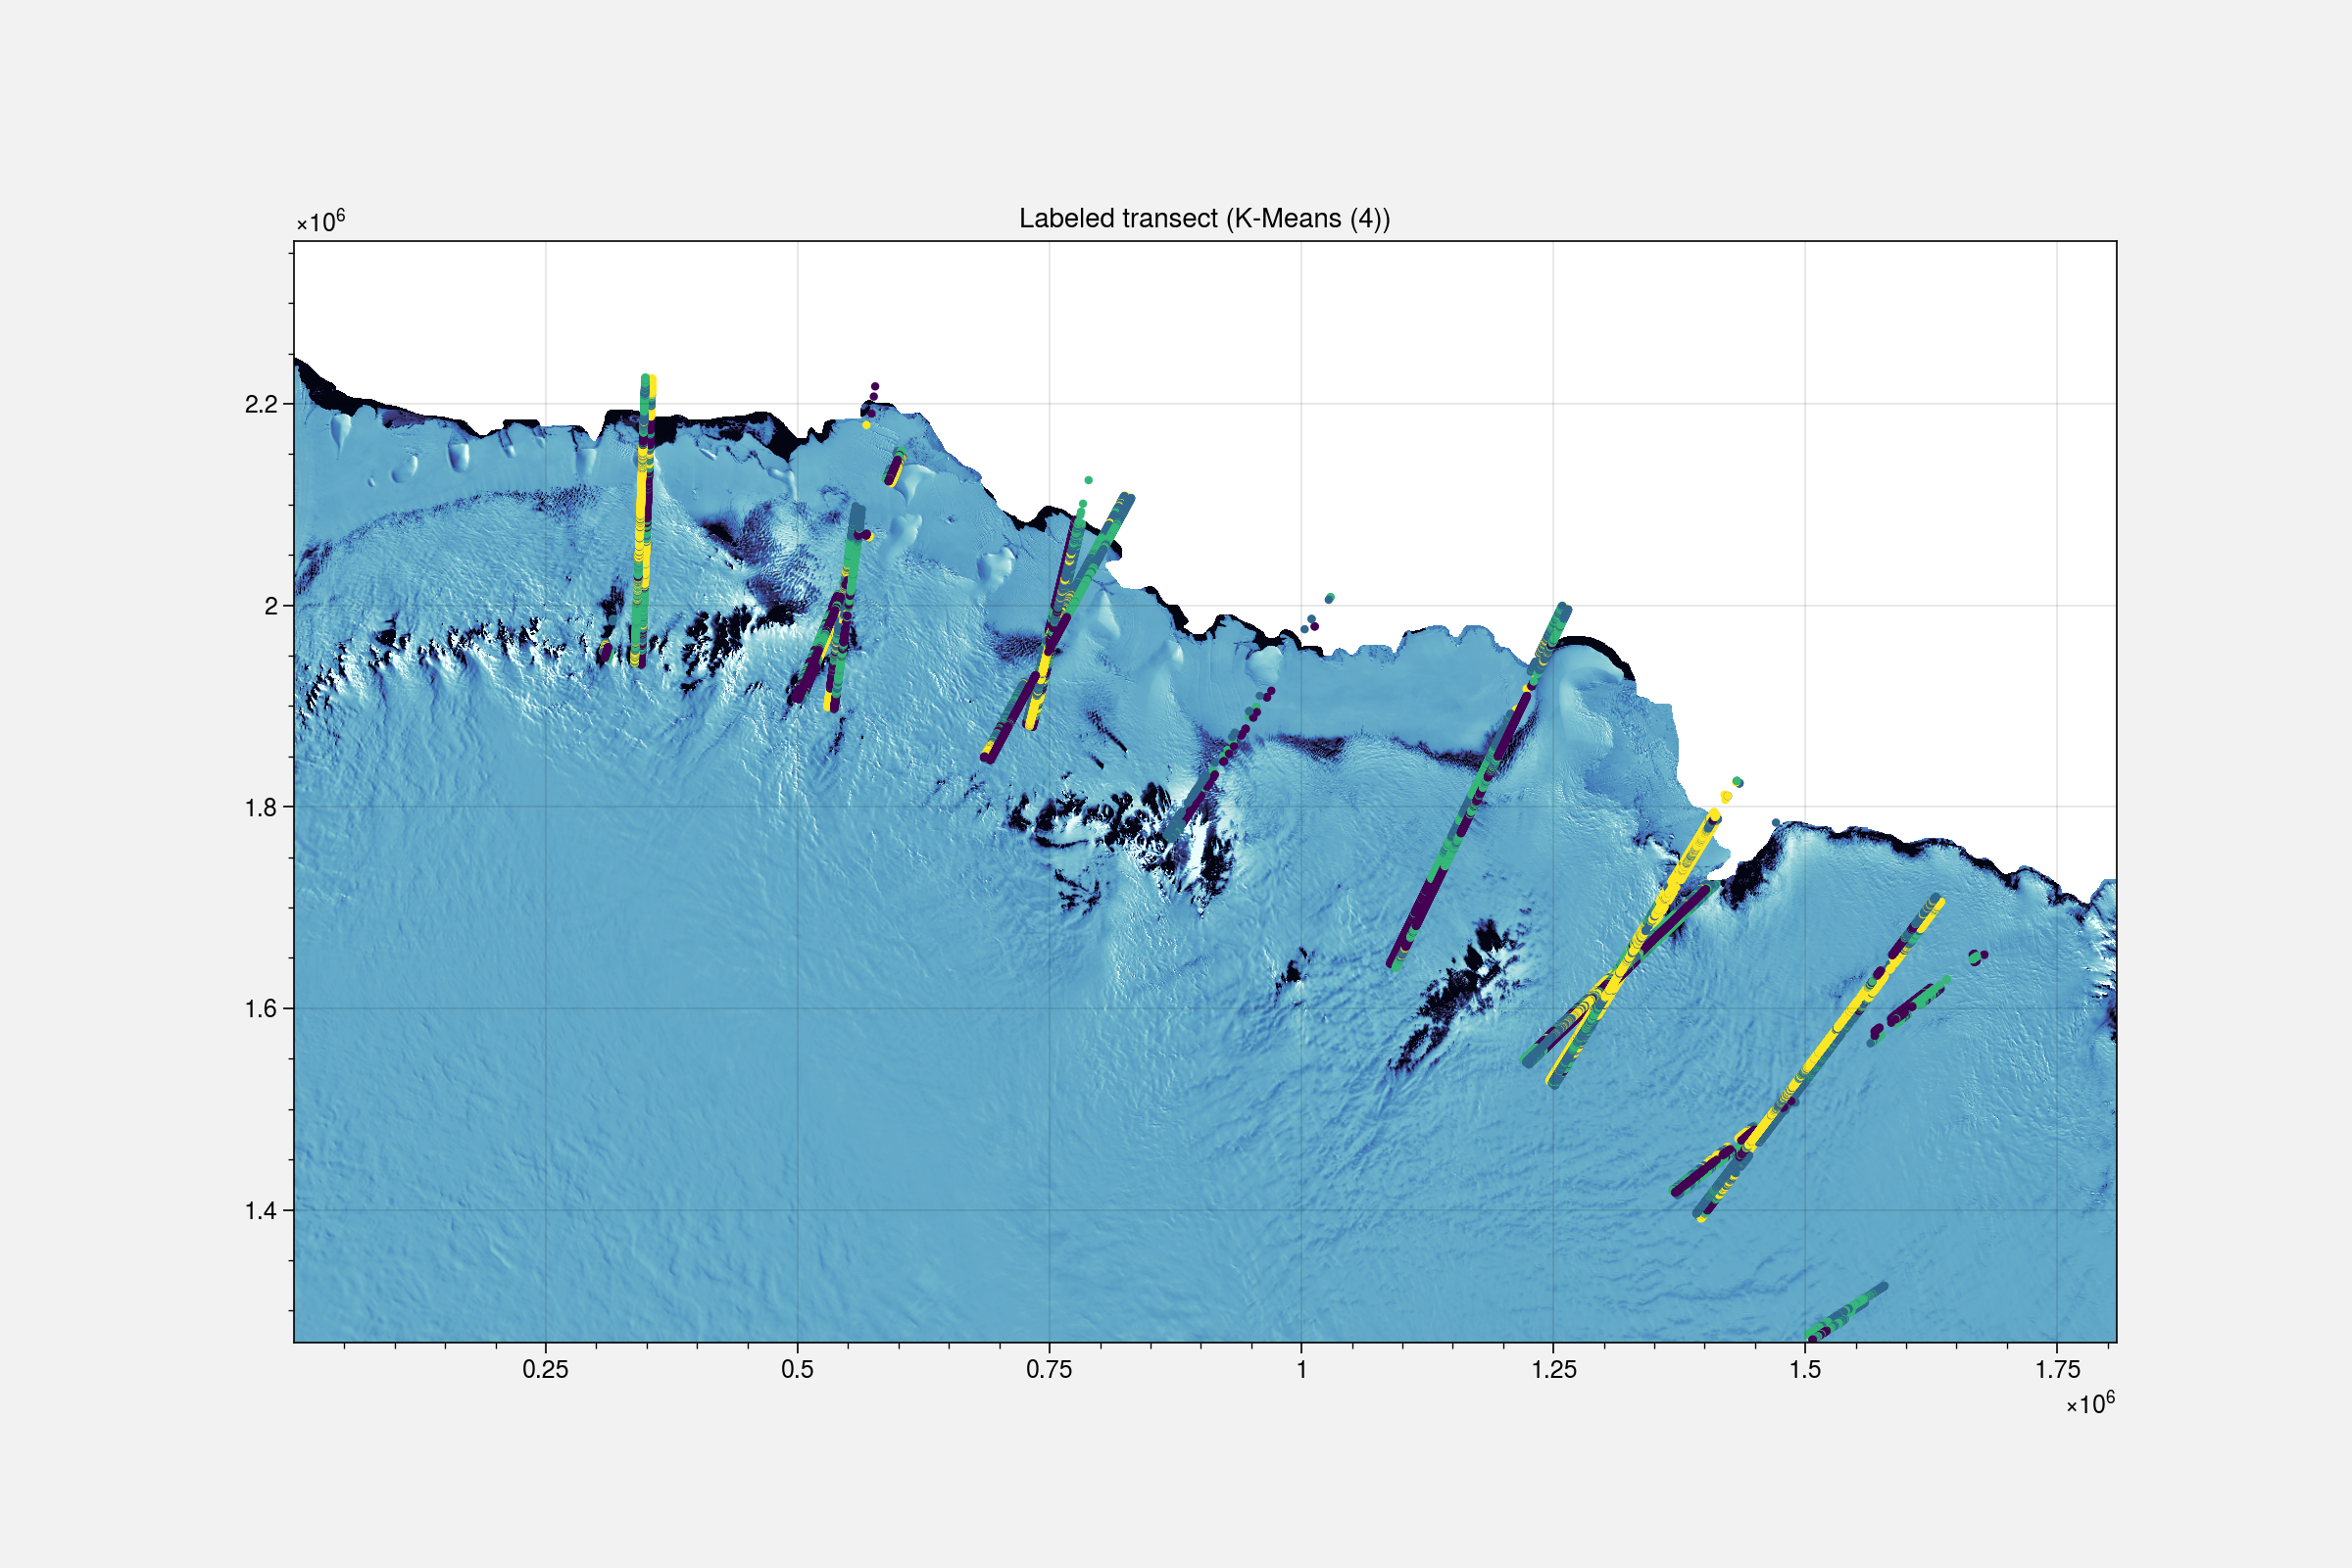

In [32]:
# show the mosaic:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
MOA.show(cmap='Ice', clim=[14000, 17000])
#plt.plot(xy[0,:], xy[1,:])

concat_lons = np.concatenate((lon_means), axis=0)
concat_lats = np.concatenate((lat_means), axis=0)

x_polar, y_polar=np.array(pyproj.Proj(3031)(concat_lons, concat_lats))
plt.scatter(x_polar, y_polar, c=kmeans4.labels_, s = 6, cmap='viridis')

plt.title('Labeled transect (K-Means (4))')

if not os.path.exists(path_clustering):
    os.makedirs(path_clustering)
fig.savefig(os.path.join(path_clustering, 'clustering' + str(spatial_extent) + '.pdf'),format='PDF')

plt.show()

Also plot the Agg results with the same number of clusters (4):

---
# Conclusions

Ideas for the Conclusions and Follow up study:

* two approaches are proposed for the differentiation between the slope effect and surface type:
 1. move from unsupervised machine learning to supervised, and use slope values from ATL06 product itself to identify any clustering based on slope
 2. continue with unsupervised machine learning, but use different input, namely momentums of the data to find relationship between standard deviation and slope, and between skewness and surface type.
* two approaches are proposed for continental scale and regional scale  surface detection:
 1. ATL06 residual_histograms to be used for continental approach
 2. ATL03 20m segments to be used for regional higher resolution surface detection

<img src="images/intro_figure.png"  width=500 height=450>